### Importing the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_roc_curve
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


### Reading the dataset

In [2]:
#Reading the DataSet
df = pd.read_csv('data.csv')

In [3]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3
7,50049,443,21285,443,allow,7912,3269,4643,23,96,12,11
8,52244,58774,2211,58774,allow,70,70,0,1,5,1,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,15,16


### Assigning Class 

In [4]:
def score_to_numeric(x):
    if x=='allow':
        return 1
    if x=='deny':
        return 0
    if x=='drop':
        return 0
    if x=='reset-both':
        return 0

In [5]:
df['output'] = df['Action'].apply(score_to_numeric)
df.tail(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,output
65522,53314,64097,0,0,deny,66,66,0,1,0,1,0,0
65523,55142,26467,0,0,deny,66,66,0,1,0,1,0,0
65524,53848,36237,0,0,deny,62,62,0,1,0,1,0,0
65525,65323,53,33275,53,allow,356,118,238,2,30,1,1,1
65526,51710,43069,65147,43069,allow,70,70,0,2,8,2,0,1
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2,1
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690,1
65529,54871,445,0,0,drop,70,70,0,1,0,1,0,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0,0
65531,54867,445,0,0,drop,70,70,0,1,0,1,0,0


In [6]:
corrMatrix = df.corr(method='spearman')
df.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,output
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962,0.132189
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909,-0.367960
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772,0.754348
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747,0.235859
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209,0.014869
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098,0.005017
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039,0.026119
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978,0.017083
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954,0.187367
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550,0.010804


In [7]:
X = df[['NAT Source Port','NAT Destination Port','Bytes','Packets','Elapsed Time (sec)']]
y = df['output']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [9]:
rfc = RandomForestClassifier(n_estimators=15,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()
svr = LinearSVC(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
#---------------------------
lr.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dt.fit(X_train,y_train)
svr.fit(X_train,y_train)
gnb.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

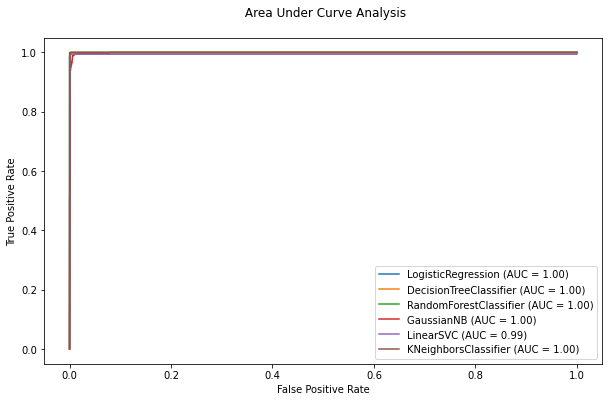

In [10]:

plt.rcParams["figure.figsize"] = [10,6]
disp = plot_roc_curve(lr,X_test,y_test)
plt.title(' Area Under Curve Analysis\n')
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

In [11]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)*100


99.97711146715496

In [12]:
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)*100

99.83978027008469

In [13]:
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)*100

99.97711146715496

In [14]:
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)*100

96.61249713893339

In [15]:
y_pred = svr.predict(X_test)
accuracy_score(y_test,y_pred)*100

99.19127183947509

In [16]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)*100

99.90081635767147

In [17]:
# X = df[['NAT Source Port','NAT Destination Port','Bytes','Packets','Elapsed Time (sec)']]
result = rfc.predict([[8334,64097,66,1,110]])
# result = round(result[0][1]*100,2)
if result[0]==1:result='Allow'
else:result='Deny'
print(f"{result} the network request")

Allow the network request
